In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import tensor_util
from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record

In [2]:
def my_summary_iterator(path):
    for r in tf_record.tf_record_iterator(path):
        yield event_pb2.Event.FromString(r)

In [13]:
#20200901-150849 'policy4'
#20200901-115421 'policy6'

date_time = '20200905-170712/'
date_time = '20200906-185009/'

summary_dir = 'logs/gradient_tape/off_policy/' + date_time + '/train'

In [14]:
def tensorboard_array(summary_dir, tag):
    res = []
    for filename in os.listdir(summary_dir):
        path = os.path.join(summary_dir, filename)
        for event in my_summary_iterator(path):
            for value in event.summary.value:
                t = tensor_util.MakeNdarray(value.tensor)
                if value.tag == tag:
                    res.append(float(t))
    return np.array(res)             

In [15]:
gvd_list = [0,1]
state_action_list = [[23,1], [33,0], [43,0], [51,1], [50,1]]

In [22]:
def tensorboard_wass_plot(summary_dir, gvd_list, state_action_list):
    fig = plt.figure(figsize =(16,12))
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2)
    ax3 = fig.add_subplot(2, 3, 3)
    ax4 = fig.add_subplot(2, 3, 4)
    ax5 = fig.add_subplot(2, 3, 5)
    dic = {}
    dic[0] = ax1
    dic[1] = ax2
    dic[2] = ax3
    dic[3] = ax4
    dic[4] = ax5
    
    for k in range(len(state_action_list)):
        s,a = state_action_list[k]
        ax = dic[k]
        for j in gvd_list:
            if j == 0:
                gvd = "Q-Learning QGVD"
            else: 
                pass
            tag = 'Wasserstein_gvd_{}_s_{}_a_{}'.format(j, s, a)
            arr = tensorboard_array(summary_dir, tag)
            ax.plot(arr, lw = 2, label = gvd)
        if a == 0:
            action = 'up'
        if a == 1:
            action = 'right'
        ax.set_title("s = {}, a = {}".format(s, action))
    plt.legend(["Q-Learning QGVD"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


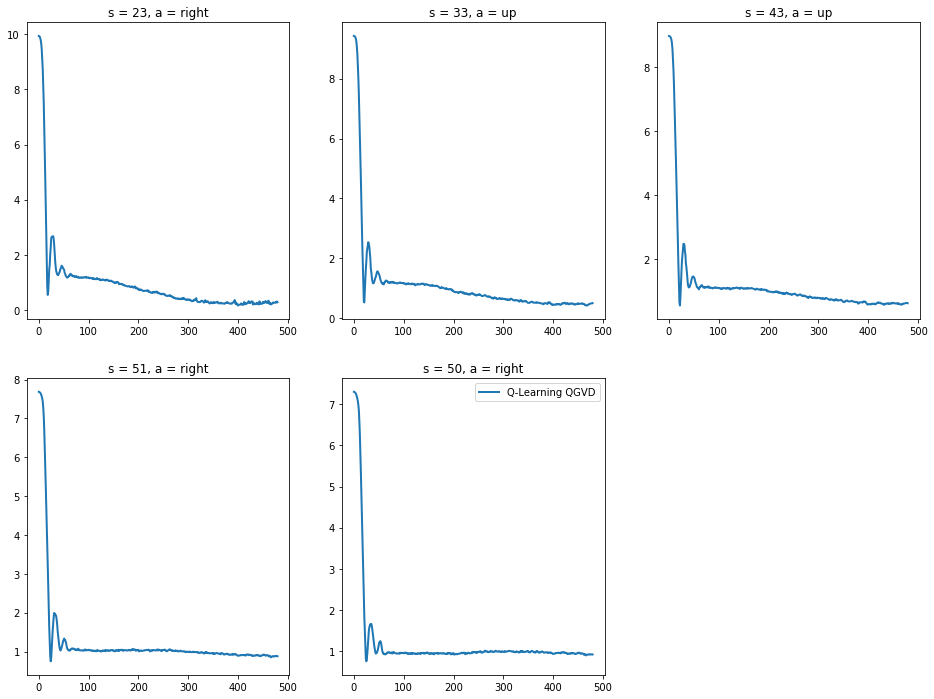

In [24]:
tensorboard_wass_plot(summary_dir, gvd_list, state_action_list)
plt.savefig("results/plots/wasserstein_distance_gaussian_control.eps",  format='eps', dpi=1200)

In [38]:
tt = tensorboard_array(summary_dir, 'Wasserstein_gvd_0_s_50_a_1')

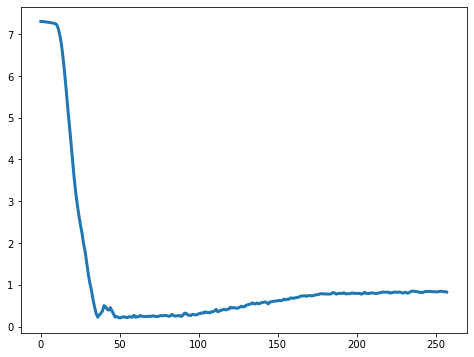

In [40]:
plt.figure(figsize= (8, 6))
plt.plot(tt, linestyle = '-', lw = 3)

In [92]:
111//10

11

In [3]:
import numpy as np

In [5]:
n = np.array([0,1,2,3,4,5])
0.01*0.5**n


array([0.01     , 0.005    , 0.0025   , 0.00125  , 0.000625 , 0.0003125])